In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Select feature (Median Income) and target (Median House Value)
x = df[['MedInc']]
y=df[['MedHouseVal']]

In [5]:
#Transform feature to Polynomial features
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly.fit_transform(x)

In [6]:
#fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [7]:
#Make Predictions
y_pred = model.predict(X_poly)


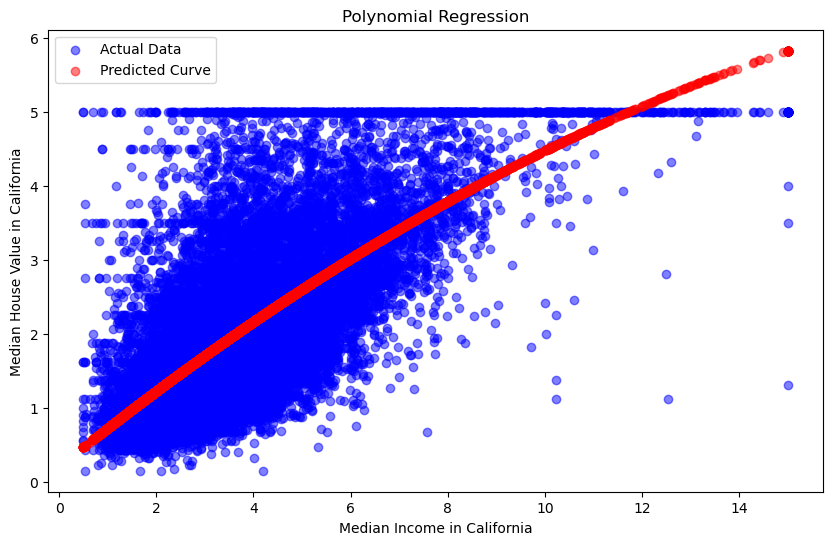

In [8]:
#Plot actual VS Predicted Values
plt.figure(figsize=(10,6))
plt.scatter(x,y,color="blue",label="Actual Data",alpha=0.5)
plt.scatter(x,y_pred,color="red",label="Predicted Curve",alpha=0.5)
plt.title("Polynomial Regression")
plt.xlabel("Median Income in California")
plt.ylabel("Median House Value in California")
plt.legend()
plt.show()

In [9]:
#Evaluate Model Performance
mse=mean_squared_error(y,y_pred)
print("Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 0.695037253723973


Ridge Regression MSE : 0.703272792117919
Lasso Regression MSE :  0.8150896447059206


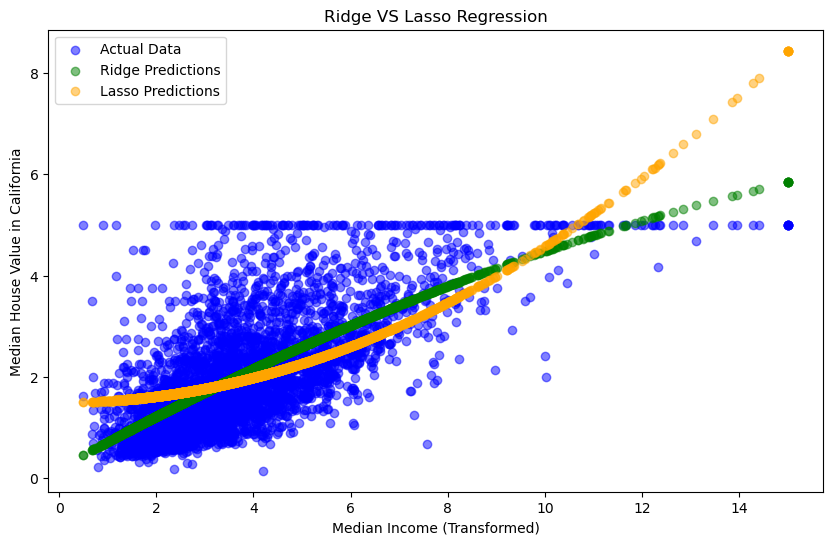

In [10]:
# Introducing Ridge & Lasso Regression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split

# split data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
ridge_predictions = ridge_model.predict(X_test)

#Lasso Regression
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
lasso_predictions= lasso_model.predict(X_test)

#Evaluate Ridge & Lasso Regression
ridge_mse = mean_squared_error (y_test,ridge_predictions)
print("Ridge Regression MSE :", ridge_mse)
lasso_mse=mean_squared_error(y_test,lasso_predictions)
print("Lasso Regression MSE : ", lasso_mse)


#Plot actual VS Predicted Values
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0],y_test,color="blue",label="Actual Data",alpha=0.5)
plt.scatter(X_test[:,0],ridge_predictions,color="green",label="Ridge Predictions",alpha=0.5)
plt.scatter(X_test[:,0],lasso_predictions,color="orange",label="Lasso Predictions",alpha=0.5)
plt.title("Ridge VS Lasso Regression")
plt.xlabel("Median Income (Transformed)")
plt.ylabel("Median House Value in California")
plt.legend()
plt.show()

# Insights:

1. **Ridge regression (green)** gives smoother, more stable predictions that better follow the trend and respect the cap in house values.
2. **Lasso regression (orange)** overestimates house values at higher income levels, showing signs of overfitting.
3. The **actual data (blue)** shows a non-linear relationship with a visible cap in house prices.
4. **Ridge performs better** in capturing the overall trend without extreme predictions.

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


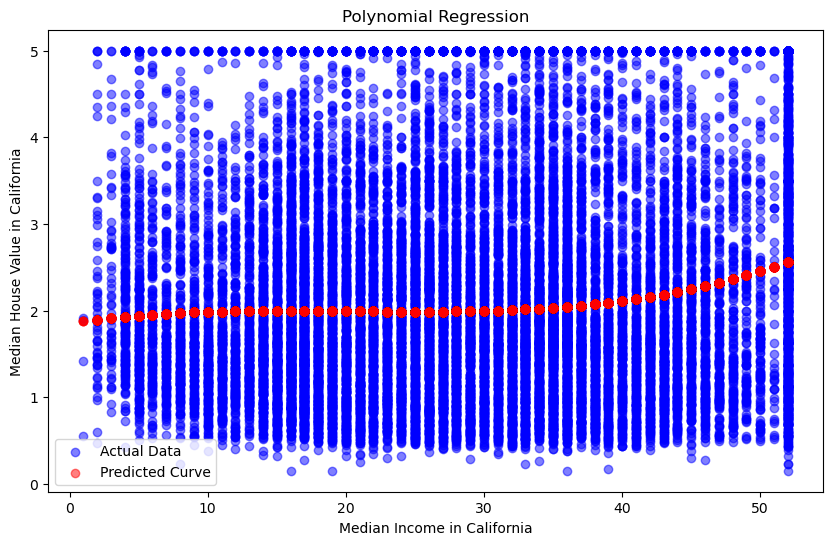

Mean Squared Error (MSE): 1.3072376879131073


In [13]:
x=df[['HouseAge']]
y=df[['MedHouseVal']]

#Transform feature to Polynomial features
poly = PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(x)

#fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly,y)

#Make Predictions
y_pred = model.predict(X_poly)

#Plot actual VS Predicted Values
plt.figure(figsize=(10,6))
plt.scatter(x,y,color="blue",label="Actual Data",alpha=0.5)
plt.scatter(x,y_pred,color="red",label="Predicted Curve",alpha=0.5)
plt.title("Polynomial Regression")
plt.xlabel("Median Income in California")
plt.ylabel("Median House Value in California")
plt.legend()
plt.show()



#Evaluate Model Performance
mse=mean_squared_error(y,y_pred)
print("Mean Squared Error (MSE):",mse)















Ridge Regression MSE : 1.2903678743717426
Lasso Regression MSE :  1.290814707940034


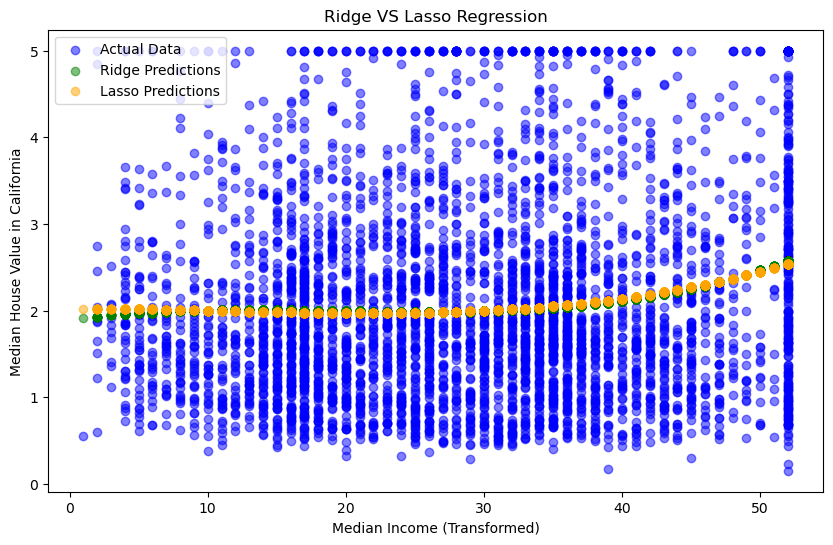

In [14]:
# Introducing Ridge & Lasso Regression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split

# split data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
ridge_predictions = ridge_model.predict(X_test)

#Lasso Regression
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
lasso_predictions= lasso_model.predict(X_test)

#Evaluate Ridge & Lasso Regression
ridge_mse = mean_squared_error (y_test,ridge_predictions)
print("Ridge Regression MSE :", ridge_mse)
lasso_mse=mean_squared_error(y_test,lasso_predictions)
print("Lasso Regression MSE : ", lasso_mse)


#Plot actual VS Predicted Values
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0],y_test,color="blue",label="Actual Data",alpha=0.5)
plt.scatter(X_test[:,0],ridge_predictions,color="green",label="Ridge Predictions",alpha=0.5)
plt.scatter(X_test[:,0],lasso_predictions,color="orange",label="Lasso Predictions",alpha=0.5)
plt.title("Ridge VS Lasso Regression")
plt.xlabel("Median Income (Transformed)")
plt.ylabel("Median House Value in California")
plt.legend()
plt.show()